#### 1. LogisticRegression

In [10]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [11]:
# Step 2: Load the dataset
df = pd.read_csv("scaled_dataset.csv")

In [12]:
# Step 3: Separate features and target
X = df.drop(columns=['Satisfaction_Satisfied'])
y = df['Satisfaction_Satisfied']

In [13]:

# Step 4: Train-test split (80/20) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [14]:
# Step 5: Initialize and train the Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [15]:
# Step 6: Make predictions
y_pred = logreg.predict(X_test)

In [16]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, target_names=['Dissatisfied', 'Satisfied'], output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Round the values for better presentation
report_df = report_df.round(4)

# Add accuracy as a separate row
report_df.loc['accuracy'] = [accuracy, None, None, None]

# Display the table
print("Logistic Regression - Classification Report\n")
print(report_df)

Logistic Regression - Classification Report

              precision  recall  f1-score  support
Dissatisfied     0.5585  0.7682    0.6468   1001.0
Satisfied        0.9116  0.7973    0.8506   2999.0
accuracy         0.7900     NaN       NaN      NaN
macro avg        0.7350  0.7827    0.7487   4000.0
weighted avg     0.8232  0.7900    0.7996   4000.0


#### Visualizing Accuracy for Logistic Regression

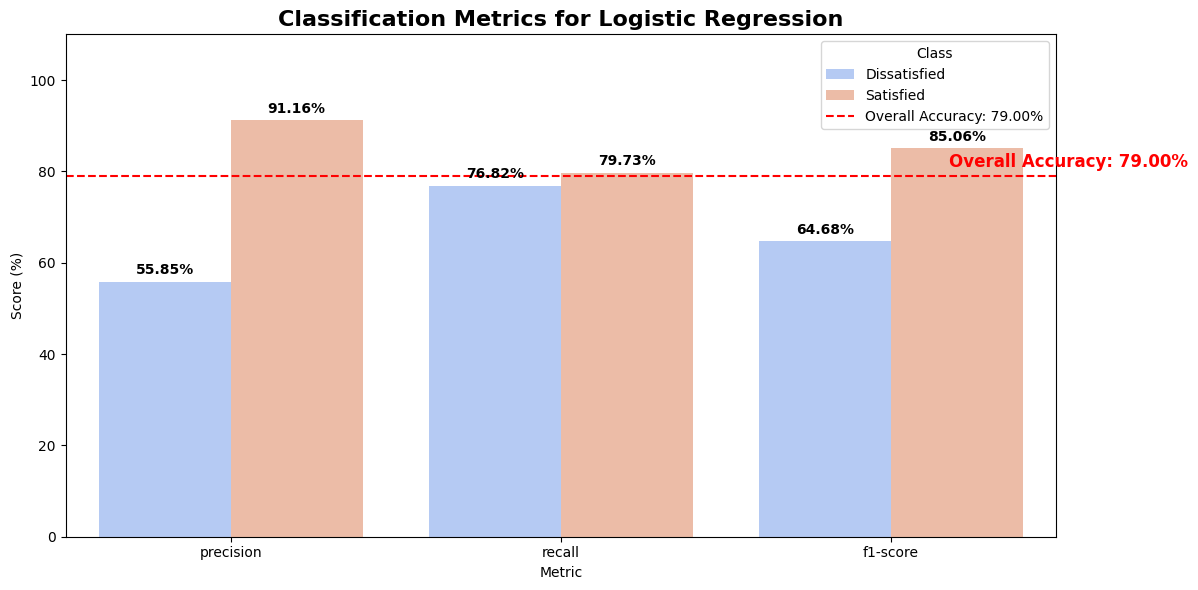

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter only the class rows (exclude accuracy, macro avg, etc.)
class_metrics = report_df.loc[['Dissatisfied', 'Satisfied'], ['precision', 'recall', 'f1-score']]

# Step 2: Reset index and melt DataFrame for plotting
class_metrics = class_metrics.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
class_metrics.rename(columns={'index': 'Class'}, inplace=True)

# Step 3: Convert scores to percentage
class_metrics['Score'] = class_metrics['Score'] * 100

# Step 4: Extract and format accuracy
accuracy_percent = float(report_df.loc['accuracy', 'precision']) * 100
accuracy_label = f"Overall Accuracy: {accuracy_percent:.2f}%"

# Step 5: Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='coolwarm')

# Add value labels to bars (excluding 0.00%)
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')

# Add horizontal accuracy line and label
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)
plt.text(
    x=2.9, y=accuracy_percent + 2,
    s=accuracy_label,
    color='red',
    fontsize=12,
    ha='right',
    fontweight='bold'
)

# Styling
plt.ylim(0, 110)
plt.title('Classification Metrics for Logistic Regression', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

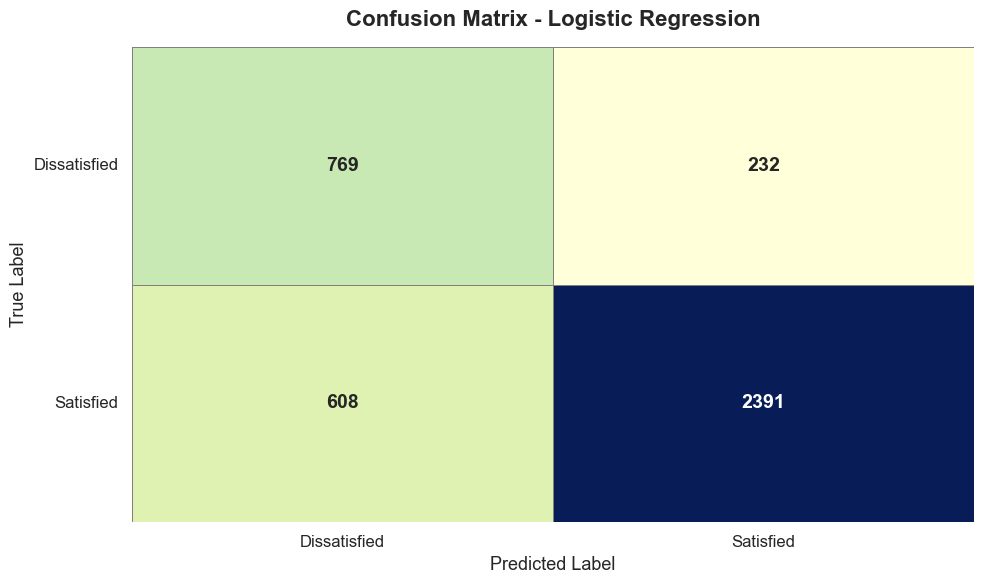

In [18]:
# Step 8: Formatted Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
labels = ['Dissatisfied', 'Satisfied']

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Draw heatmap with enhanced formatting
ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    xticklabels=labels,
    yticklabels=labels,
    cbar=False,
    linewidths=0.5,
    linecolor='gray',
    annot_kws={"size": 14, "weight": "bold"}
)

# Add labels and title with better formatting
plt.title("Confusion Matrix - Logistic Regression", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Predicted Label", fontsize=13)
plt.ylabel("True Label", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

#### Visualizing Training and Testing Accuracy

In [89]:
from sklearn.metrics import accuracy_score

# Step 4: Evaluate training and testing accuracy
# Predict on training and test data
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.7979
Testing Accuracy: 0.7955


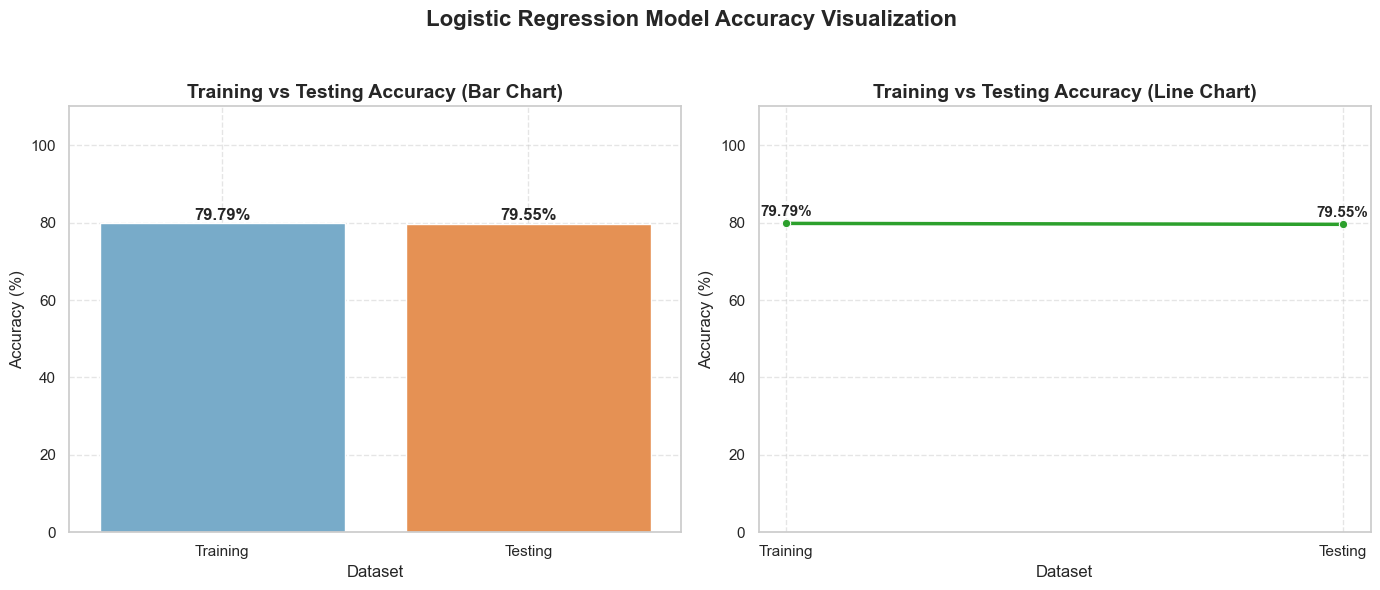

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Convert to percentage
train_acc_percent = train_accuracy * 100
test_acc_percent = test_accuracy * 100

# Prepare data for plotting
acc_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_acc_percent, test_acc_percent]
})

# Updated custom colors
colors = ['#6BAED6', '#FD8D3C']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Bar Chart ---
sns.barplot(data=acc_df, x='Dataset', y='Accuracy', palette=colors, ax=axes[0])

# Add labels on bars
for i, row in acc_df.iterrows():
    axes[0].text(i, row['Accuracy'] + 1, f"{row['Accuracy']:.2f}%", ha='center', fontsize=12, fontweight='bold')

axes[0].set_ylim(0, 110)
axes[0].set_title("Training vs Testing Accuracy (Bar Chart)", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Accuracy (%)")
axes[0].grid(True, linestyle='--', alpha=0.5)

# --- Line Chart ---
sns.lineplot(data=acc_df, x='Dataset', y='Accuracy', marker='o', linewidth=2.5, ax=axes[1], color='#2CA02C')
axes[1].set_ylim(0, 110)
axes[1].set_title("Training vs Testing Accuracy (Line Chart)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Accuracy (%)")
axes[1].grid(True, linestyle='--', alpha=0.5)

# Add labels to line plot points
for i, row in acc_df.iterrows():
    axes[1].text(i, row['Accuracy'] + 2, f"{row['Accuracy']:.2f}%", ha='center', fontsize=11, fontweight='bold')

# Final layout
plt.suptitle("Logistic Regression Model Accuracy Visualization", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### 2. Decision Tree

In [19]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [20]:
# Step 2: Load and Split the Dataset
# Load dataset
dataset = pd.read_csv('scaled_dataset.csv')

# Split into features and target
X = dataset.drop(columns=['Satisfaction_Satisfied'])
y = dataset['Satisfaction_Satisfied']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### Step 3: Train the Decision Tree Model

In [21]:
# Initialize and train Decision Tree with tuned parameters
dt_model = DecisionTreeClassifier(
    criterion='entropy',         # Use information gain
    max_depth=10,                # Limit depth to prevent overfitting
    min_samples_split=10,        # Require at least 10 samples to split
    min_samples_leaf=5,          # Require at least 5 samples per leaf
    max_features='sqrt',         # Consider sqrt(n_features) at each split
    random_state=42
)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [22]:
# Step 4: Make Predictions
y_pred = dt_model.predict(X_test)

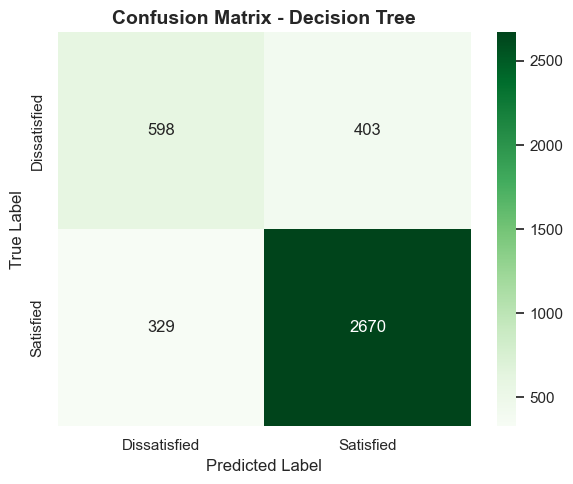

In [23]:
#Step 5: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
labels = ['Dissatisfied', 'Satisfied']

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - Decision Tree", fontsize=14, fontweight='bold')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [24]:
#Step 6: Classification Report Table
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, target_names=['Dissatisfied', 'Satisfied'], output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(4)

# Add accuracy as a separate row (under 'precision' column)
report_df.loc['accuracy'] = [accuracy, None, None, None]
print("Decision Tree - Classification Report\n")
print(report_df)

Decision Tree - Classification Report

              precision  recall  f1-score  support
Dissatisfied     0.6451  0.5974    0.6203   1001.0
Satisfied        0.8689  0.8903    0.8794   2999.0
accuracy         0.8170     NaN       NaN      NaN
macro avg        0.7570  0.7438    0.7499   4000.0
weighted avg     0.8129  0.8170    0.8146   4000.0


#### Visualizing The overall accuracy

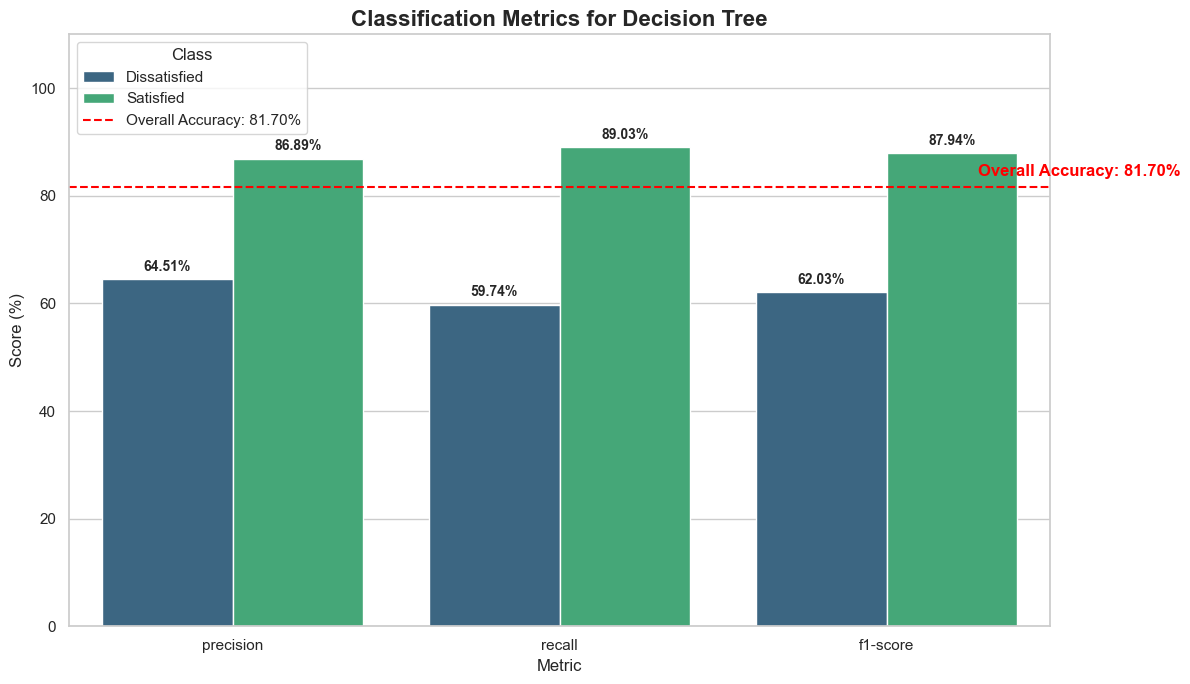

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only class rows (Dissatisfied and Satisfied)
class_metrics = report_df.loc[['Dissatisfied', 'Satisfied'], ['precision', 'recall', 'f1-score']]

# Prepare for plotting
class_metrics = class_metrics.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
class_metrics.rename(columns={'index': 'Class'}, inplace=True)

# Convert scores to percentage
class_metrics['Score'] = class_metrics['Score'] * 100

# Extract accuracy
accuracy_percent = float(report_df.loc['accuracy', 'precision']) * 100
accuracy_label = f"Overall Accuracy: {accuracy_percent:.2f}%"

# Plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='viridis')

# Add percentage labels to bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Skip 0.00%
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')

# Add accuracy line
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)
plt.text(
    x=2.9, y=accuracy_percent + 2,
    s=accuracy_label,
    color='red',
    fontsize=12,
    ha='right',
    fontweight='bold'
)

# Styling
plt.ylim(0, 110)
plt.title('Classification Metrics for Decision Tree', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


#### Visualizing Training and Testing Accuracy

In [93]:
from sklearn.metrics import accuracy_score
# Predict on training and test data
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.8410
Testing Accuracy: 0.8453


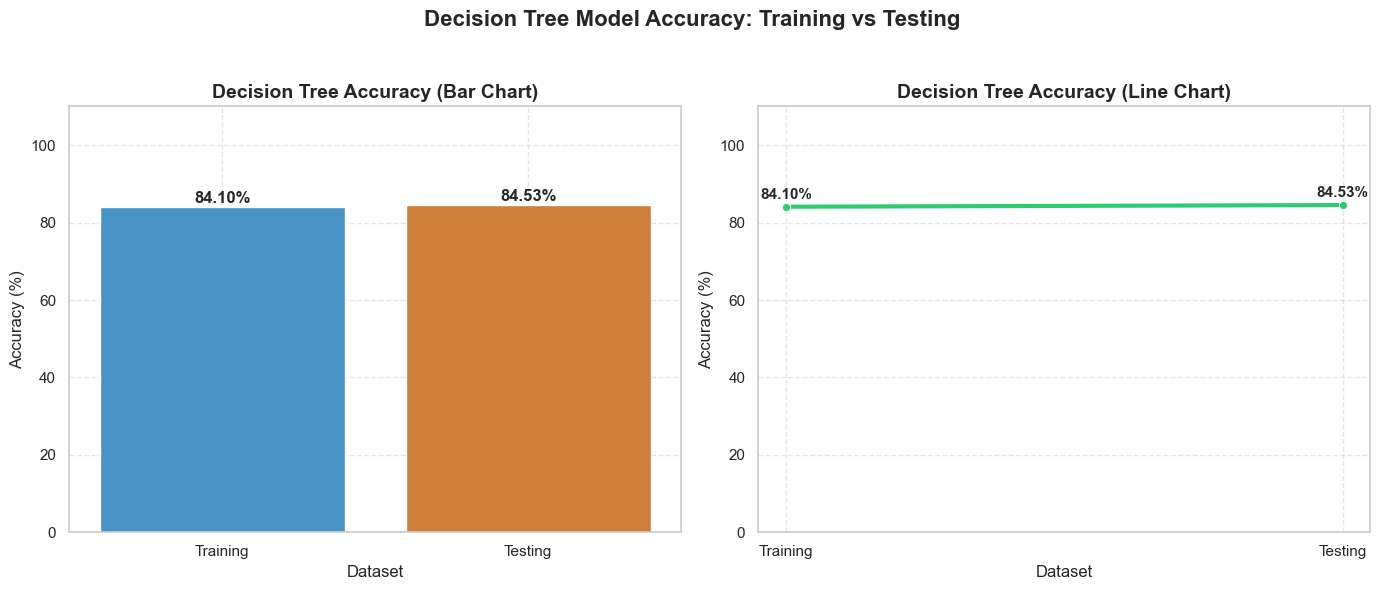

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Step 1: Predict on training and testing sets
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Step 2: Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Step 3: Convert to percentages
train_acc_percent = train_accuracy * 100
test_acc_percent = test_accuracy * 100

# Step 4: Create DataFrame
acc_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_acc_percent, test_acc_percent]
})

# Step 5: Set modern style
sns.set(style='whitegrid')

# Step 6: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Bar Chart ---
sns.barplot(data=acc_df, x='Dataset', y='Accuracy', palette=['#3498DB', '#E67E22'], ax=axes[0])
axes[0].set_title("Decision Tree Accuracy (Bar Chart)", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Accuracy (%)")
axes[0].set_ylim(0, 110)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Add labels on bars
for i, row in acc_df.iterrows():
    axes[0].text(i, row['Accuracy'] + 1, f"{row['Accuracy']:.2f}%", ha='center', fontsize=12, fontweight='bold')

# --- Line Chart ---
sns.lineplot(data=acc_df, x='Dataset', y='Accuracy', marker='o', linewidth=3, color='#2ECC71', ax=axes[1])
axes[1].set_title("Decision Tree Accuracy (Line Chart)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Accuracy (%)")
axes[1].set_ylim(0, 110)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Add labels on points
for i, row in acc_df.iterrows():
    axes[1].text(i, row['Accuracy'] + 2, f"{row['Accuracy']:.2f}%", ha='center', fontsize=11, fontweight='bold')

# Step 7: Final layout
plt.suptitle("Decision Tree Model Accuracy: Training vs Testing", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### 3. Random Forest

In [97]:
# Step 1: Import Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [114]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,                 # Number of trees in the forest
    criterion='gini',                 # Function to measure the quality of a split: 'gini' or 'entropy'
    max_depth=None,                  # Max depth of the tree (None means nodes are expanded until all leaves are pure)
    min_samples_split=2,            # Minimum number of samples required to split an internal node
    min_samples_leaf=1,             # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,   # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    max_features='sqrt',            # Number of features to consider when looking for the best split
    max_leaf_nodes=None,            # Grow trees with max_leaf_nodes in best-first fashion
    min_impurity_decrease=0.0,      # Node will be split if this split induces a decrease of impurity greater than or equal to this value
    bootstrap=True,                 # Whether bootstrap samples are used when building trees
    oob_score=False,                # Whether to use out-of-bag samples to estimate the generalization score
    n_jobs=-1,                      # Number of jobs to run in parallel (-1 means using all processors)
    random_state=42,                # Seed for reproducibility
    verbose=0,                      # Controls the verbosity when fitting and predicting
    warm_start=False,               # Reuse the solution of the previous call to fit and add more estimators to the ensemble
    class_weight='balanced',        # Automatically adjust weights inversely proportional to class frequencies
    ccp_alpha=0.0,                  # Complexity parameter used for Minimal Cost-Complexity Pruning
    max_samples=None                # Number of samples to draw from X to train each base estimator (only if bootstrap=True)
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [115]:
#Step 3: Make Predictions
y_pred = rf_model.predict(X_test)

In [116]:
# Step 4: Generate Classification Report and Accuracy
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(
    y_test, y_pred,
    target_names=['Dissatisfied', 'Satisfied'],
    output_dict=True
)

In [117]:
#Step 5: Convert Report to DataFrame and Add Accuracy
report_df = pd.DataFrame(report_dict).transpose().round(4)
report_df.loc['accuracy'] = [accuracy, None, None, None]
print("Random Forest - Classification Report\n")
print(report_df)

Random Forest - Classification Report

              precision  recall  f1-score  support
Dissatisfied   0.684000  0.5825    0.6291   1449.0
Satisfied      0.873100  0.9143    0.8932   4551.0
accuracy       0.834167     NaN       NaN      NaN
macro avg      0.778500  0.7484    0.7612   6000.0
weighted avg   0.827400  0.8342    0.8294   6000.0


In [118]:
#Step 6: Prepare Data for Visualization
# Filter class-specific metrics only
class_metrics = report_df.loc[['Dissatisfied', 'Satisfied'], ['precision', 'recall', 'f1-score']]

# Reshape for plotting
class_metrics = class_metrics.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
class_metrics.rename(columns={'index': 'Class'}, inplace=True)

# Convert scores to percentage
class_metrics['Score'] = class_metrics['Score'] * 100


In [119]:
#Step 7: Extract Accuracy for Display
accuracy_percent = accuracy * 100
accuracy_label = f"Overall Accuracy: {accuracy_percent:.2f}%"


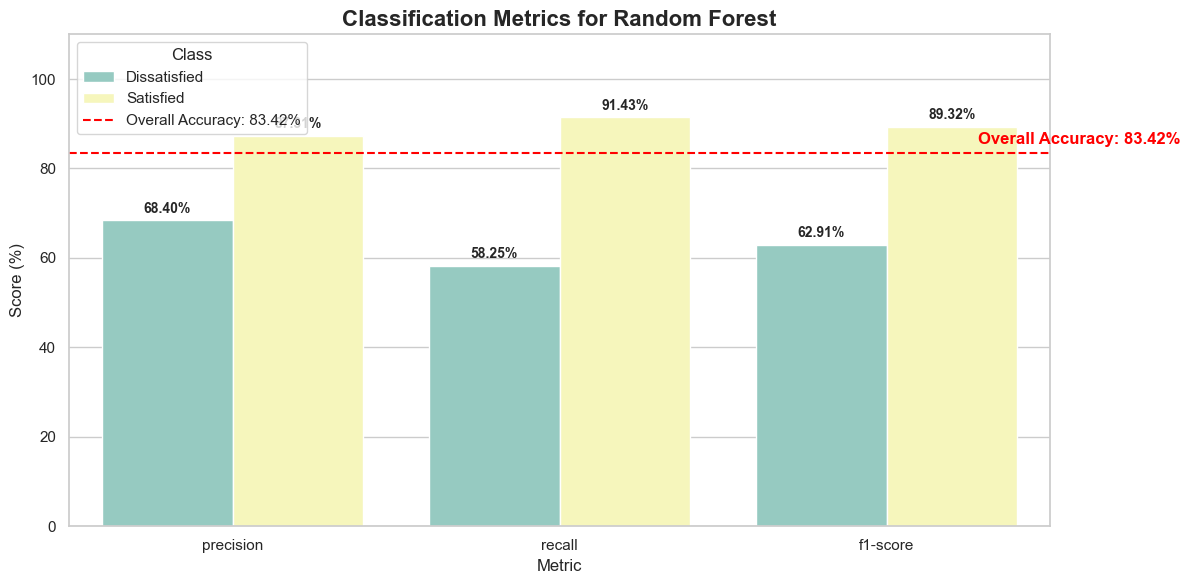

In [120]:
#Step 8: Plot Classification Metrics
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='Set3')
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)
plt.text(
    x=2.9, y=accuracy_percent + 2,
    s=accuracy_label,
    color='red',
    fontsize=12,
    ha='right',
    fontweight='bold'
)

plt.ylim(0, 110)
plt.title('Classification Metrics for Random Forest', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

#### Visualizing Training and Testing Accuarcy

In [121]:
from sklearn.metrics import accuracy_score
# Predict on training and test data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 1.0000
Testing Accuracy: 0.8342


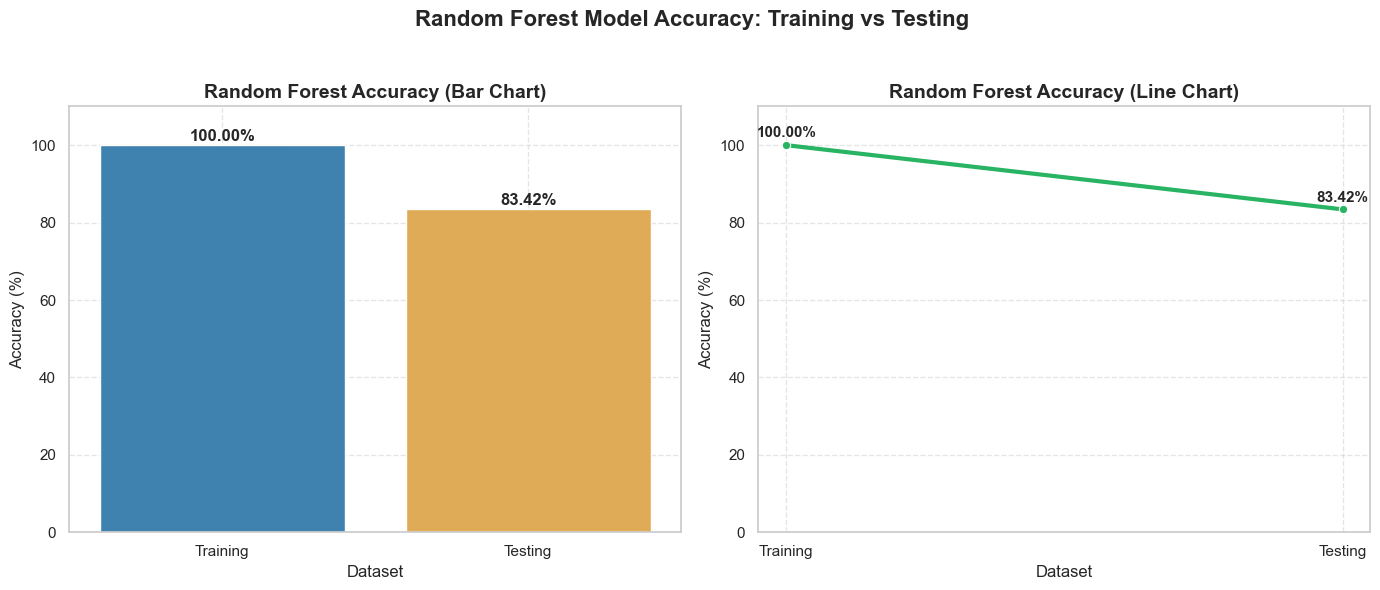

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Step 1: Predict
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Step 2: Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Step 3: Convert to percentage
train_acc_percent = train_accuracy * 100
test_acc_percent = test_accuracy * 100

# Step 4: Prepare DataFrame
acc_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_acc_percent, test_acc_percent]
})

# Step 5: Set style
sns.set(style='whitegrid')

# Step 6: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Bar Chart ---
sns.barplot(data=acc_df, x='Dataset', y='Accuracy', palette=['#2E86C1', '#F5B041'], ax=axes[0])
axes[0].set_title("Random Forest Accuracy (Bar Chart)", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Accuracy (%)")
axes[0].set_ylim(0, 110)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Add labels on bars
for i, row in acc_df.iterrows():
    axes[0].text(i, row['Accuracy'] + 1, f"{row['Accuracy']:.2f}%", ha='center', fontsize=12, fontweight='bold')

# --- Line Chart ---
sns.lineplot(data=acc_df, x='Dataset', y='Accuracy', marker='o', linewidth=3, color='#28B463', ax=axes[1])
axes[1].set_title("Random Forest Accuracy (Line Chart)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Accuracy (%)")
axes[1].set_ylim(0, 110)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Add labels on points
for i, row in acc_df.iterrows():
    axes[1].text(i, row['Accuracy'] + 2, f"{row['Accuracy']:.2f}%", ha='center', fontsize=11, fontweight='bold')

# Step 7: Final layout
plt.suptitle("Random Forest Model Accuracy: Training vs Testing", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### 4. Support Vector Machine (SVM)

In [34]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [35]:
# Step 2: Load and Prepare the Data
# Assuming X and y are already defined (features and target variable)
X = dataset.drop(columns=['Satisfaction_Satisfied'])  # Replace with your feature columns
y = dataset['Satisfaction_Satisfied']  # Replace with your target variable column


In [36]:
# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Step 4: Train the Support Vector Machine (SVM) Model
svm_model = SVC(
    C=1.0,                        # Regularization parameter (higher = less regularization)
    kernel='rbf',                 # Kernel type: 'rbf' (radial basis function)
    degree=3,                     # Degree for 'poly' kernel (ignored by other kernels)
    gamma='scale',                # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    coef0=0.0,                    # Independent term in kernel function
    shrinking=True,               # Use shrinking heuristic (faster training)
    probability=True,             # Enable probability estimates
    tol=1e-3,                     # Tolerance for stopping criterion
    cache_size=200,               # Size of kernel cache (in MB)
    class_weight='balanced',      # Handle unbalanced class weights
    verbose=False,                # Disable verbose output
    random_state=42               # Reproducibility
)

# Fit the model to the training data
svm_model.fit(X_train, y_train)


SVC(class_weight='balanced', probability=True, random_state=42)

In [38]:
# Step 5: Make Predictions
# Predict on the test set
y_pred = svm_model.predict(X_test)

In [39]:
#  Step 6: Evaluate the Model - Classification Report
# Get accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

# Classification report
report_dict = classification_report(y_test, y_pred, target_names=['Dissatisfied', 'Satisfied'], output_dict=True)

# Convert to DataFrame for easy visualization
report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(4)

# Add accuracy as a separate row
report_df.loc['accuracy'] = [accuracy, None, None, None]
print("SVM - Classification Report\n")
print(report_df)


Accuracy: 81.10%

SVM - Classification Report

              precision  recall  f1-score  support
Dissatisfied     0.5850  0.7644    0.6628    972.0
Satisfied        0.9161  0.8260    0.8687   3028.0
accuracy         0.8110     NaN       NaN      NaN
macro avg        0.7506  0.7952    0.7658   4000.0
weighted avg     0.8357  0.8110    0.8187   4000.0


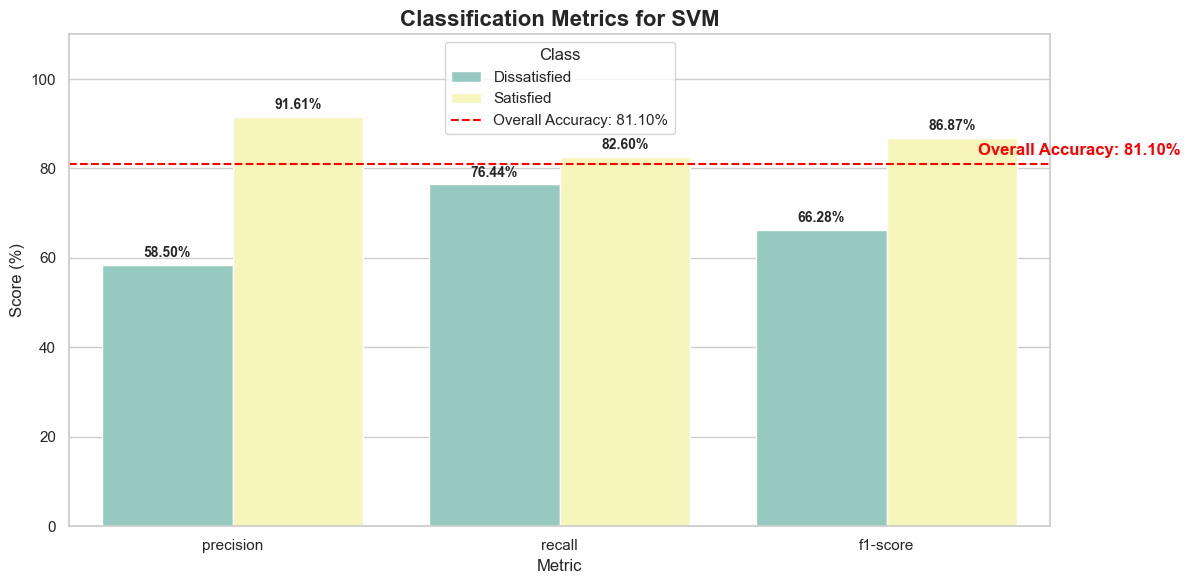

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter only the class rows (Dissatisfied and Satisfied)
class_metrics = report_df.loc[['Dissatisfied', 'Satisfied'], ['precision', 'recall', 'f1-score']]

# Step 2: Prepare for plotting
class_metrics = class_metrics.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
class_metrics.rename(columns={'index': 'Class'}, inplace=True)

# Step 3: Convert scores to percentage
class_metrics['Score'] = class_metrics['Score'] * 100

# Step 4: Extract accuracy and label
accuracy_percent = float(report_df.loc['accuracy', 'precision']) * 100
accuracy_label = f"Overall Accuracy: {accuracy_percent:.2f}%"

# Step 5: Plot Classification Metrics
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='Set3')

# Add value labels above bars (excluding 0.00%)
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')

# Add horizontal accuracy line and label
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)
plt.text(
    x=2.9, y=accuracy_percent + 2,
    s=accuracy_label,
    color='red',
    fontsize=12,
    ha='right',
    fontweight='bold'
)

# Styling
plt.ylim(0, 110)
plt.title('Classification Metrics for SVM', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')
plt.legend(title='Class')
plt.tight_layout()
plt.show()


#### Visualizing Training and Testing Accuracy

In [123]:
from sklearn.metrics import accuracy_score
# Predict on training and test data
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.8166
Testing Accuracy: 0.8093


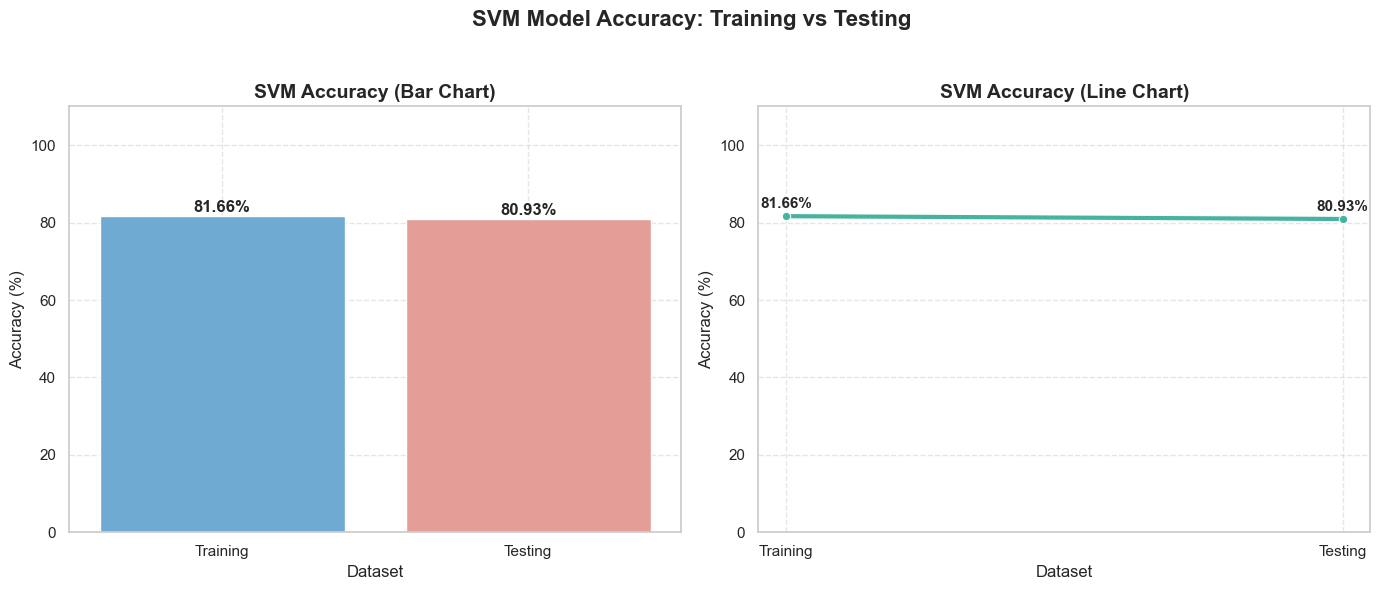

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Step 1: Predict
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Step 2: Accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Step 3: Convert to percentage
train_acc_percent = train_accuracy * 100
test_acc_percent = test_accuracy * 100

# Step 4: Prepare DataFrame
acc_df = pd.DataFrame({
    'Dataset': ['Training', 'Testing'],
    'Accuracy': [train_acc_percent, test_acc_percent]
})

# Step 5: Set style
sns.set(style='whitegrid')

# Step 6: Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Bar Chart ---
sns.barplot(data=acc_df, x='Dataset', y='Accuracy', palette=['#5DADE2', '#F1948A'], ax=axes[0])
axes[0].set_title("SVM Accuracy (Bar Chart)", fontsize=14, fontweight='bold')
axes[0].set_ylabel("Accuracy (%)")
axes[0].set_ylim(0, 110)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Add labels on bars
for i, row in acc_df.iterrows():
    axes[0].text(i, row['Accuracy'] + 1, f"{row['Accuracy']:.2f}%", ha='center', fontsize=12, fontweight='bold')

# --- Line Chart ---
sns.lineplot(data=acc_df, x='Dataset', y='Accuracy', marker='o', linewidth=3, color='#45B39D', ax=axes[1])
axes[1].set_title("SVM Accuracy (Line Chart)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Accuracy (%)")
axes[1].set_ylim(0, 110)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Add labels on points
for i, row in acc_df.iterrows():
    axes[1].text(i, row['Accuracy'] + 2, f"{row['Accuracy']:.2f}%", ha='center', fontsize=11, fontweight='bold')

# Step 7: Final layout
plt.suptitle("SVM Model Accuracy: Training vs Testing", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### 5. XGBoost

In [41]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [43]:
# Load the dataset from the previous session (already loaded as 'df') and prepare X and y
X = dataset.drop(columns='Satisfaction_Satisfied')  # Features
y = df['Satisfaction_Satisfied']  # Target variable

In [ ]:
# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Step 3: Train the XGBoost model with parameters

# Suppress unnecessary user warnings from XGBoost
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='xgboost')

# Import the XGBoost classifier
from xgboost import XGBClassifier

# Initialize the XGBoost classifier with tuned hyperparameters
xgb_model = XGBClassifier(
    n_estimators=100,           # Number of boosting rounds (trees)
    max_depth=5,                # Maximum depth of a tree
    learning_rate=0.1,          # Step size shrinkage to prevent overfitting
    subsample=0.8,              # Percentage of rows used per tree
    colsample_bytree=0.8,       # Percentage of columns used per tree
    min_child_weight=1,         # Minimum sum of instance weight (hessian) needed in a child
    gamma=0,                    # Minimum loss reduction required for a split
    reg_alpha=0.01,             # L1 regularization term on weights
    reg_lambda=1,               # L2 regularization term on weights
    random_state=42,            # Random seed for reproducibility
    use_label_encoder=False,    # Disable the use of legacy label encoder
    eval_metric='logloss'       # Evaluation metric for training
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [47]:
# Step 4: Predictions
y_pred = xgb_model.predict(X_test)

In [48]:
# Step 5: Classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
report_dict = classification_report(y_test, y_pred, target_names=['Dissatisfied', 'Satisfied'], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose().round(4)
report_df.loc['accuracy'] = [accuracy, None, None, None]

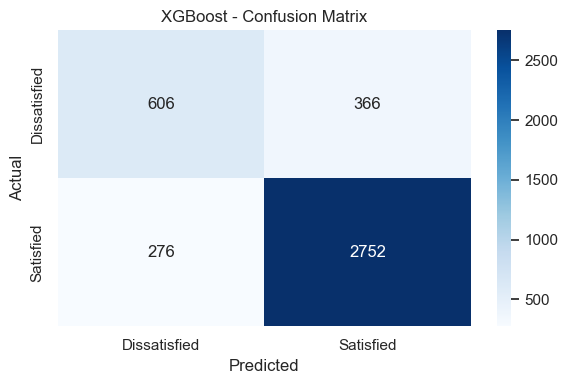

In [49]:
# Step 6: Confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dissatisfied', 'Satisfied'], yticklabels=['Dissatisfied', 'Satisfied'])
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [50]:
# Step 7: Prepare classification metrics for plotting
class_metrics = report_df.loc[['Dissatisfied', 'Satisfied'], ['precision', 'recall', 'f1-score']]
class_metrics = class_metrics.reset_index().melt(id_vars='index', var_name='Metric', value_name='Score')
class_metrics.rename(columns={'index': 'Class'}, inplace=True)
class_metrics['Score'] = class_metrics['Score'] * 100


In [51]:
# Extract accuracy
accuracy_percent = float(report_df.loc['accuracy', 'precision']) * 100
accuracy_label = f"Overall Accuracy: {accuracy_percent:.2f}%"


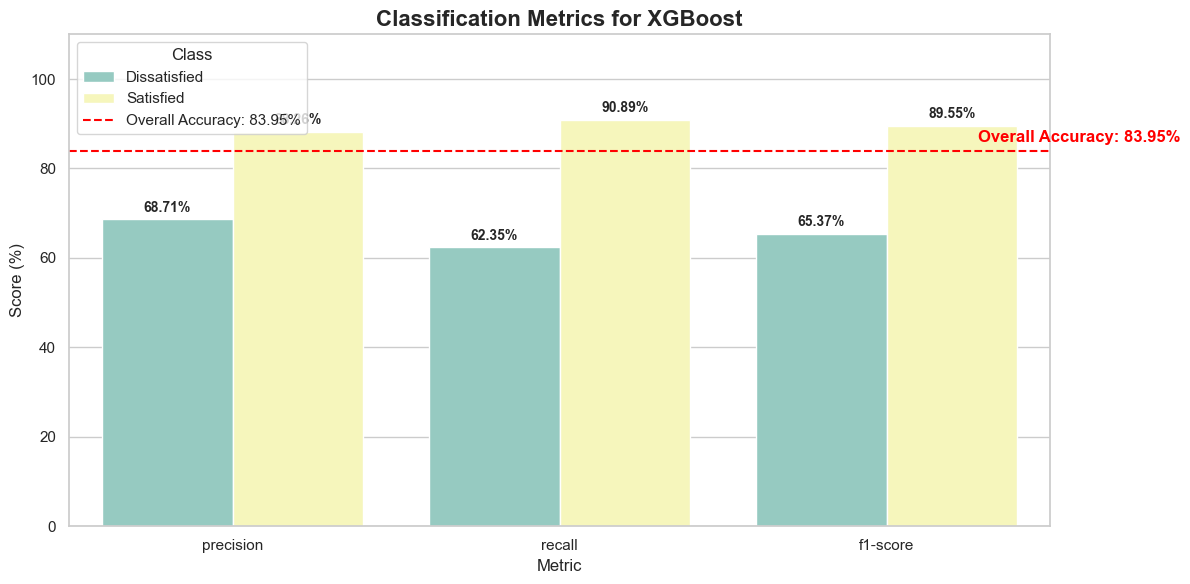

,precision,recall,f1-score,support
Dissatisfied,0.6871,0.6235,0.6537,972.0
Satisfied,0.8826,0.9089,0.8955,3028.0
accuracy,0.8395,NaN,NaN,NaN
macro avg,0.7848,0.7662,0.7746,4000.0
weighted avg,0.8351,0.8395,0.8368,4000.0


In [54]:
# Step 8: Plot classification metrics with accuracy line
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=class_metrics, x='Metric', y='Score', hue='Class', palette='Set3')

# Add labels to bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        x = bar.get_x() + bar.get_width() / 2
        ax.text(x, height + 1, f'{height:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')

# Add overall accuracy line
plt.axhline(accuracy_percent, color='red', linestyle='--', linewidth=1.5, label=accuracy_label)
plt.text(2.9, accuracy_percent + 2, accuracy_label, color='red', fontsize=12, ha='right', fontweight='bold')

plt.ylim(0, 110)
plt.title('Classification Metrics for XGBoost', fontsize=16, fontweight='bold')
plt.ylabel('Score (%)')
plt.xlabel('Metric')
plt.legend(title='Class')
plt.tight_layout()
plt.show()

# Output classification report DataFrame
report_df

#### Training and Testing Accuracy

In [56]:
from sklearn.metrics import accuracy_score

# Step 4: Evaluate training and testing accuracy
# Predict on training and test data
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")


Training Accuracy: 0.8676
Testing Accuracy: 0.8395


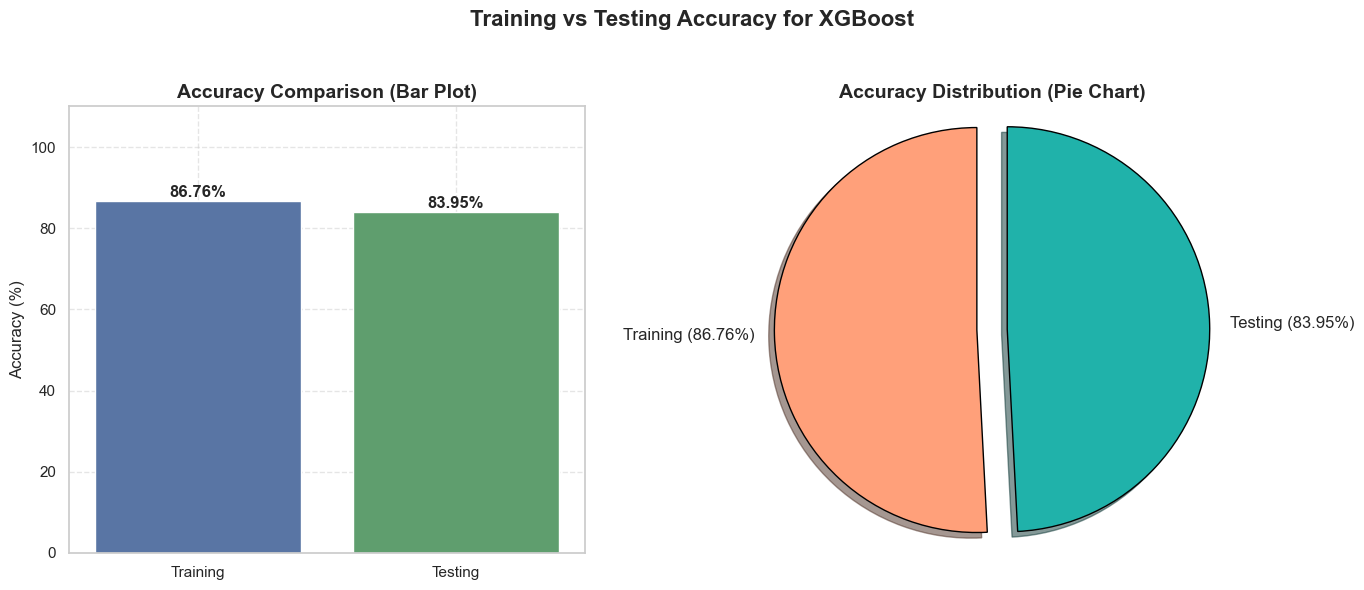

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')
# Step 5: Prepare data for visualization
accuracy_data = pd.DataFrame({
    'Data Split': ['Training', 'Testing'],
    'Accuracy': [train_accuracy * 100, test_accuracy * 100]
})

# Custom color palette
bar_colors = ['#4C72B0', '#55A868']  # Blue and green tones
pie_colors = ['#FFA07A', '#20B2AA']  # Light salmon and light sea green

# Explode values for pie chart (offset slices)
explode = (0.05, 0.1)

# Step 6: Create subplot layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Bar Plot ---
sns.barplot(ax=axes[0], data=accuracy_data, x='Data Split', y='Accuracy', palette=bar_colors)

# Add accuracy labels on bars
for i, row in accuracy_data.iterrows():
    axes[0].text(i, row['Accuracy'] + 1, f"{row['Accuracy']:.2f}%", ha='center', fontsize=12, fontweight='bold')

# Style bar plot
axes[0].set_ylim(0, 110)
axes[0].set_title('Accuracy Comparison (Bar Plot)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_xlabel('')
axes[0].grid(True, linestyle='--', alpha=0.5)

# --- Pie Chart ---
pie_labels = [f"{row['Data Split']} ({row['Accuracy']:.2f}%)" for _, row in accuracy_data.iterrows()]

axes[1].pie(
    accuracy_data['Accuracy'],
    labels=pie_labels,
    startangle=90,
    colors=pie_colors,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
axes[1].set_title('Accuracy Distribution (Pie Chart)', fontsize=14, fontweight='bold')
axes[1].axis('equal')  # Equal aspect ratio for perfect circle

# Final layout
plt.suptitle('Training vs Testing Accuracy for XGBoost', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### All Classical Algoritms In One

In [108]:
# Step 1: Import Libraries
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [109]:
# Step 1: Load your dataset (replace the file path with the actual path to your CSV)
data = pd.read_csv('scaled_dataset.csv')

# Assuming that the last column is the target variable
X = data.iloc[:, :-1]  # All columns except the last one as features
y = data.iloc[:, -1]   # The last column as the target

In [110]:
# Step 2: Preprocessing - Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
# Step 3: Initialize models with parameters
models = {
    "Logistic Regression": LogisticRegression(solver='liblinear', C=1.0, max_iter=100),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200,                 # Number of trees in the forest
    criterion='gini',                 # Function to measure the quality of a split: 'gini' or 'entropy'
    max_depth=None,                  # Max depth of the tree (None means nodes are expanded until all leaves are pure)
    min_samples_split=2,            # Minimum number of samples required to split an internal node
    min_samples_leaf=1,             # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,   # Minimum weighted fraction of the sum total of weights required to be at a leaf node
    max_features='sqrt',            # Number of features to consider when looking for the best split
    max_leaf_nodes=None,            # Grow trees with max_leaf_nodes in best-first fashion
    min_impurity_decrease=0.0,      # Node will be split if this split induces a decrease of impurity greater than or equal to this value
    bootstrap=True,                 # Whether bootstrap samples are used when building trees
    oob_score=False,                # Whether to use out-of-bag samples to estimate the generalization score
    n_jobs=-1,                      # Number of jobs to run in parallel (-1 means using all processors)
    random_state=42,                # Seed for reproducibility
    verbose=0,                      # Controls the verbosity when fitting and predicting
    warm_start=False,               # Reuse the solution of the previous call to fit and add more estimators to the ensemble
    class_weight='balanced',        # Automatically adjust weights inversely proportional to class frequencies
    ccp_alpha=0.0,                  # Complexity parameter used for Minimal Cost-Complexity Pruning
    max_samples=None                # Number of samples to draw from X to train each base estimator (only if bootstrap=True)
),
    "SVM": SVC(kernel='linear', C=1.0, gamma='scale'),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, objective='multi:softmax', num_class=3)
}

In [112]:
# Step 4: Train the models and evaluate accuracies
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    # Training and testing accuracy
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    results.append({
        "Model": model_name,
        "Training Accuracy": train_accuracy * 100,
        "Testing Accuracy": test_accuracy * 100
    })

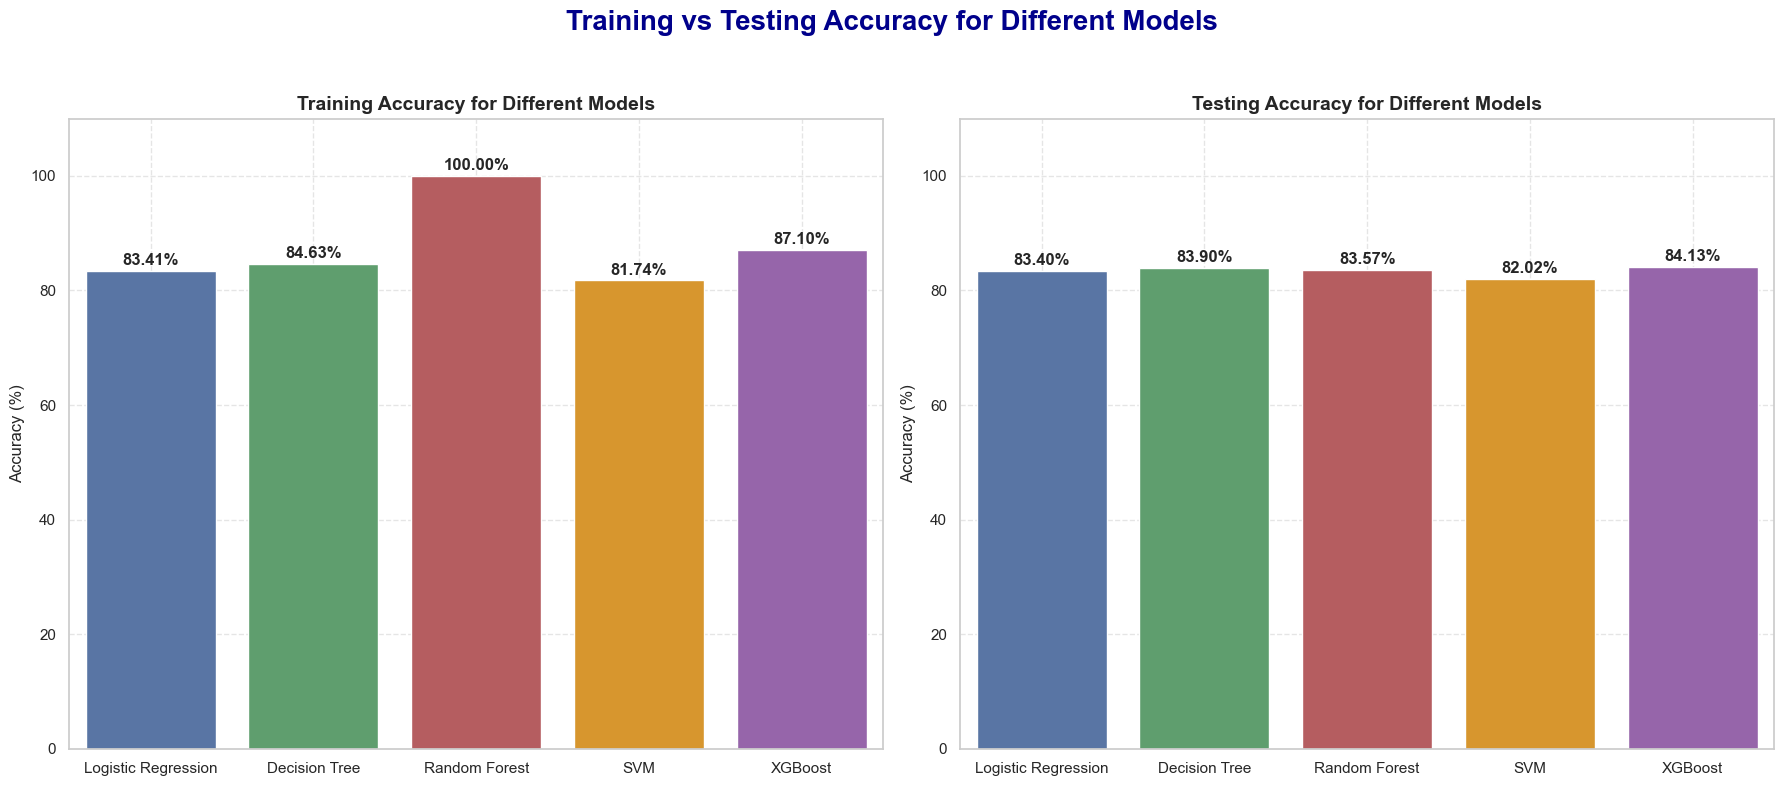

In [113]:
# Step 5: Prepare data for visualization
accuracy_df = pd.DataFrame(results)

# Custom color palettes
bar_colors = ['#4C72B0', '#55A868', '#C44E52', '#F39C12', '#9B59B6']  # Customize colors

# Step 6: Create subplot layout
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# --- Bar Plot for Training Accuracy ---
sns.barplot(ax=axes[0], data=accuracy_df, x='Model', y='Training Accuracy', palette=bar_colors)

# Add accuracy labels on bars for training accuracy
for i, row in accuracy_df.iterrows():
    axes[0].text(i, row['Training Accuracy'] + 1, f"{row['Training Accuracy']:.2f}%", ha='center', fontsize=12, fontweight='bold')

# Style bar plot for training accuracy
axes[0].set_ylim(0, 110)
axes[0].set_title('Training Accuracy for Different Models', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_xlabel('')
axes[0].grid(True, linestyle='--', alpha=0.5)

# --- Bar Plot for Testing Accuracy ---
sns.barplot(ax=axes[1], data=accuracy_df, x='Model', y='Testing Accuracy', palette=bar_colors)

# Add accuracy labels on bars for testing accuracy
for i, row in accuracy_df.iterrows():
    axes[1].text(i, row['Testing Accuracy'] + 1, f"{row['Testing Accuracy']:.2f}%", ha='center', fontsize=12, fontweight='bold')

# Style bar plot for testing accuracy
axes[1].set_ylim(0, 110)
axes[1].set_title('Testing Accuracy for Different Models', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_xlabel('')
axes[1].grid(True, linestyle='--', alpha=0.5)

# Final layout
plt.suptitle('Training vs Testing Accuracy for Different Models', fontsize=20, fontweight='bold', color='darkblue')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()